In [1]:
import tweepy, json, pymongo
import pandas as pd
import numpy as np
from twitterscraper import *
from TextAnalysis import *
from utils import *
from analysis import *

In [2]:
# retrieving previously saved tweets from json file
electionTweets = loadTweets(collectionName='americanElectionsOriginal',fromDb=True)

electionTweetsDf = pd.DataFrame(electionTweets)
electionTweetsDf.drop(['fullname','id','likes','replies','retweets','timestamp','url'],axis=1,inplace=True)


In [3]:
electionTweetsDf = electionTweetsDf.sort_values(by='user')
electionTweetsDf

,text,user
0,“I want us once again to think big and look up...,HillaryClinton
3395,"""We need to rely on what actually works, not b...",HillaryClinton
3396,Hillary has a three-part plan to defeat ISIS i...,HillaryClinton
3397,"""We can’t let fear stop us from doing what’s n...",HillaryClinton
3398,Slogans aren’t a strategy. Loose cannons tend ...,HillaryClinton
3399,"""If Mr. Trump gets his way, it'll be like Chri...",HillaryClinton
3400,America should not be shutting our doors to or...,HillaryClinton
3401,"In our fight against radical jihadism, we have...",HillaryClinton
3402,When Republican candidates like Ted Cruz call ...,HillaryClinton
3403,"""If I’m president, the United States will not ...",HillaryClinton


In [4]:
clintonTweets = electionTweetsDf[electionTweetsDf['user']=='HillaryClinton']
trumpTweets = electionTweetsDf[electionTweetsDf['user']=='realDonaldTrump']



In [5]:
from unidecode import unidecode

stopWords = set(stopwords.words("english"))
stopWords.update(['realdonaldtrump', 'hillaryclinton','trump','clinton','donald','hillary','clinton2016',
'trump2016', 'hillary2016','makeamericagreatagain'])

texts = list(electionTweetsDf['text'])
cleanedTexts = list(map(lambda x: text_clean(unidecode(x)),texts))

electionTweetsDf['clean_text'] = cleanedTexts
features = list(map(lambda x: text_preprocess(x,nGrams=[2,3], stopWords = stopWords), cleanedTexts))
features[0]

{'emoticons': [],
 'nGrams': ['want_us',
  'us_think',
  'think_big',
  'big_look',
  'look_beyond',
  'beyond_horizon',
  'horizon_s',
  's_possible',
  'possible_america',
  'want_us_think',
  'us_think_big',
  'think_big_look',
  'big_look_beyond',
  'look_beyond_horizon',
  'beyond_horizon_s',
  'horizon_s_possible',
  's_possible_america'],
 'words': [('want', 'v', 'want', 'want'),
  ('us', 'n', 'us', 'u'),
  ('think', 'v', 'think', 'think'),
  ('big', 'a', 'big', 'big'),
  ('look', 'v', 'look', 'look'),
  ('beyond', 'n', 'beyond', 'beyond'),
  ('horizon', 'n', 'horizon', 'horizon'),
  ('s', 'v', 's', 's'),
  ('possible', 'a', 'possibl', 'possible'),
  ('america', 'n', 'america', 'america')]}

In [6]:
bow = getBow(features,asBoolean=False,useNGrams=True)


In [7]:
typeOfWords = 'stems'

sat = getSatisfyingTweets('america',bow,minN=1,wordType=typeOfWords)
sat

[('TweetID: 0', 'Times america appears: 1'),
 ('TweetID: 4', 'Times america appears: 1'),
 ('TweetID: 5', 'Times america appears: 1'),
 ('TweetID: 6', 'Times america appears: 1'),
 ('TweetID: 13', 'Times america appears: 1'),
 ('TweetID: 18', 'Times america appears: 1'),
 ('TweetID: 28', 'Times america appears: 1'),
 ('TweetID: 56', 'Times america appears: 1'),
 ('TweetID: 65', 'Times america appears: 1'),
 ('TweetID: 98', 'Times america appears: 1'),
 ('TweetID: 136', 'Times america appears: 2'),
 ('TweetID: 168', 'Times america appears: 1'),
 ('TweetID: 172', 'Times america appears: 2'),
 ('TweetID: 174', 'Times america appears: 1'),
 ('TweetID: 178', 'Times america appears: 1'),
 ('TweetID: 184', 'Times america appears: 2'),
 ('TweetID: 211', 'Times america appears: 1'),
 ('TweetID: 235', 'Times america appears: 1'),
 ('TweetID: 256', 'Times america appears: 2'),
 ('TweetID: 306', 'Times america appears: 1'),
 ('TweetID: 308', 'Times america appears: 1'),
 ('TweetID: 321', 'Times am

In [8]:
tmpTop = getTopNWords(bow=bow,keepNumber=False,n=60,typeOfWords=typeOfWords,useEmo=True)
topWords = [x for x in tmpTop if x not in ['s',"n't",'re','h','ca']][:50]

In [9]:
#Defining a new dataframe as bow representation(matrix term-tweet)

#useNGrams = True
#if useNGrams:
    #wordDict = {x:bow[typeOfWords][x] for x in bow[typeOfWords] if sum(bow[typeOfWords][x])>5}
    #filteredNGrams = {x:bow['nGrams'][x] for x in bow['nGrams'] if sum(bow['nGrams'][x])>5}
    #wordDict.update(filteredNGrams)#TO USE ONLY IF NGRAMS ARE USED
#else:
    #wordDict = {x:bow[typeOfWords][x] for x in topStems}

bowDf = pd.DataFrame({x:bow[typeOfWords][x] for x in topWords})
#bowDf

In [10]:
bowDf

,america,american,back,big,campaign,candid,cnn,countri,cruz,day,...,tonight,us,vote,want,watch,win,women,work,would,year
0,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
8,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.decomposition import PCA
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, show, output_file
pca = PCA(n_components=.8)
pca.fit(bowDf)
transformed = pca.transform(bowDf)
pcscores = pd.DataFrame(transformed)
pcscores.columns = ['PC' + str(i + 1) for i in range(pcscores.shape[1])]
loadings = pd.DataFrame(pca.components_, columns=list(bowDf.columns))
load_squared = loadings.transpose() ** 2
load_squared.columns = ['PC' + str(i + 1) for i in range(pcscores.shape[1])]

In [12]:
pcscores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
0,0.397013,-0.254572,0.111403,-0.116161,-0.109418,-0.016533,-0.131309,-0.117755,0.026811,0.195275,...,0.510150,0.125326,0.325659,-0.030269,0.185716,-0.308561,-0.283839,0.662178,-0.005231,-0.054299
1,0.376088,-0.648642,0.739430,0.245909,0.102168,0.242258,0.333450,-0.592941,-0.106532,0.142166,...,0.058922,0.212425,0.352135,0.190071,0.077011,0.024956,0.085013,-0.335155,-0.234365,-0.591817
2,-0.143304,-0.012614,0.014138,-0.076379,-0.074764,-0.114375,-0.091737,-0.006671,-0.021725,-0.071479,...,-0.000501,-0.014805,-0.036850,-0.055131,-0.016397,-0.031998,0.027803,-0.003185,-0.030908,-0.008780
3,0.345593,-0.590762,0.447410,0.302767,-0.141554,-0.242614,-0.290224,-0.365577,-0.077741,1.437272,...,0.421459,0.295688,1.123716,-0.368441,0.684679,-0.534839,-0.283560,-0.224222,0.015213,-0.557607
4,0.376299,-0.321987,0.573201,0.071144,-0.049137,0.177825,0.354336,-0.321424,-0.178298,-0.463635,...,0.080741,0.059285,-0.014452,-0.022325,0.016978,-0.005668,-0.022423,0.051461,0.052098,0.028310
5,0.878060,-0.665555,0.383071,0.094702,0.005189,0.781145,-0.708100,-0.345007,0.333747,0.486024,...,-0.114269,-0.262445,0.148360,-0.106956,0.068217,0.025368,0.052554,0.110556,0.074664,0.013761
6,0.392613,-0.223493,-0.153139,-0.141536,0.659004,-0.065246,0.027055,-0.264569,0.058700,0.149562,...,0.273458,-0.001989,0.031270,-0.155551,0.036600,0.034574,-0.051855,0.063663,0.035788,0.053184
7,-0.101487,-0.134326,0.110691,-0.004871,0.019337,0.019639,-0.083961,-0.181479,0.001236,-0.043569,...,0.418834,0.112822,0.285742,0.240781,0.055150,0.479794,0.293019,-0.475499,-0.791273,-0.791082
8,-0.298112,-0.212418,-0.074830,-0.289079,0.107802,0.100512,-0.078807,0.046109,-0.086616,0.165863,...,0.188580,-0.585615,-0.001711,-0.177138,0.166556,-0.182430,0.004796,-0.340809,0.601281,0.266066
9,-0.212730,-0.250788,0.400331,-0.059463,0.088078,0.085941,0.251015,0.574158,0.283330,0.353412,...,-0.085988,-0.198461,0.036653,0.100534,-0.095382,-0.002099,0.099187,0.034066,0.016015,-0.074140


In [13]:
from matplotlib import pyplot as plt

loadings.index = ['PC'+str(j+1) for j in range(len(loadings))]

# loadings = loadings.iloc[0:30, :]  # Use only a subset of the data
#loadings = loadings.transpose()  # Use rotation

words = loadings.columns.tolist()
pc_names = loadings.index.tolist()


xname = []
yname = []
color = []
alpha = []
for i, pc in enumerate(pc_names):
    for j, word in enumerate(words):
        xname.append(word)
        yname.append(pc)

        alpha.append(min(loadings.iloc[i, j]**2, 0.9)+0.1)  # Transparency is square of loading factor

        # Color denotes sign of loading factor
        if loadings.iloc[i, j] > 0:
            color_to_use = '#5ab4ac'
        else:
            color_to_use = '#d8b365'

        if abs(loadings.iloc[i, j]) < 0.1:
            color_to_use = '#f5f5f5'

        color.append(color_to_use)

source = ColumnDataSource(data=dict(
    xname=xname,
    yname=yname,
    colors=color,
    alphas=alpha,
    count=loadings.values.flatten(),
))

p = figure(title="PCA Loading Factors",
           x_axis_location="above", tools="pan,wheel_zoom,box_zoom,reset,hover,save",
           x_range=words, y_range=list(reversed(pc_names)))

p.plot_width = 1000
p.plot_height = 1000
p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "8pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi / 3

p.rect('xname', 'yname', 0.9, 0.9, source=source,
       color='colors', alpha='alphas', line_color=None)

p.select_one(HoverTool).tooltips = [
    ('pc/word', '@yname, @xname'),
    ('factor', '@count'),
]

output_file("pca_factors.html", title="PCA Loading Factors")

show(p)


In [14]:
pc_names

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34']

In [15]:
import seaborn as sns
sns.set_style('whitegrid')
# Grid PCA plot with Seaborn
label_array = np.array([0]*len(trumpTweets) + [1]*len(clintonTweets))
data = pcscores.iloc[:, 0:2]
data = pd.concat([data, pd.Series(label_array, name='label')], axis=1)
data = data.replace({'label': {0: 'Hillary Clinton', 1: 'Donald Trump'}})
# Normalize range to -1 to 1
for col in data.columns:
    if col == 'label': continue
    data[col] = data[col].apply(lambda x: x*1.0 / (data[col].max() - data[col].min()))
# sns.set_style('whitegrid')
g = sns.pairplot(data=data, hue='label', palette={'Hillary Clinton': 'blue', 'Donald Trump': 'red'},
                 diag_kind='kde', plot_kws=dict(alpha=0.5))
sns.reset_orig()

# Loading factor Seaborn heatmap
ax = sns.heatmap(loadings, center=0, linewidths=0.5, cmap="BrBG", vmin=-1, vmax=1)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90, fontsize=8)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0, fontsize=8)

plt.savefig('seaborn.png')

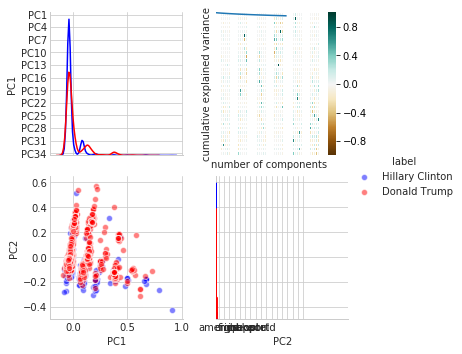

In [16]:
num_obs = pca.n_samples_
num_vars = len(pca.components_)
sing_vals = np.arange(num_vars) + 1

plt.xticks(np.arange(min(sing_vals), max(sing_vals)+1, 2.0))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

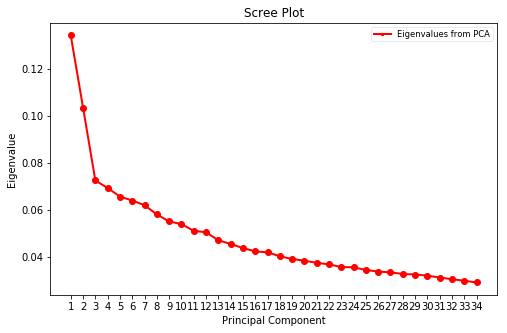

In [17]:
import matplotlib.font_manager as fnt


eigvals = pca.explained_variance_

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.xticks(np.arange(min(sing_vals), max(sing_vals)+1, 1.0))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, 
                 shadow=False, prop=fnt.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

In [18]:
upd=getUpdatedTextsTfIdf(features,typeOfWords='stems',useNGrams=True)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vocabulary = bowDf.columns.tolist()
vect = TfidfVectorizer(vocabulary=vocabulary)

tfIdf = vect.fit_transform(upd)

In [20]:
feature_names = vect.get_feature_names()
corpus_index = [doc for doc in upd]
rows, cols = tfIdf.nonzero()
for row, col in zip(rows, cols):
    print((feature_names[col], corpus_index[row]), tfIdf[row, col])

('want', 'want us think big look beyond horizon s possibl america  want_us us_think think_big big_look look_beyond beyond_horizon horizon_s s_possible possible_america want_us_think us_think_big think_big_look big_look_beyond look_beyond_horizon beyond_horizon_s horizon_s_possible s_possible_america') 0.506250989853
('us', 'want us think big look beyond horizon s possibl america  want_us us_think think_big big_look look_beyond beyond_horizon horizon_s s_possible possible_america want_us_think us_think_big think_big_look big_look_beyond look_beyond_horizon beyond_horizon_s horizon_s_possible s_possible_america') 0.524285490023
('big', 'want us think big look beyond horizon s possibl america  want_us us_think think_big big_look look_beyond beyond_horizon horizon_s s_possible possible_america want_us_think us_think_big think_big_look big_look_beyond look_beyond_horizon beyond_horizon_s horizon_s_possible s_possible_america') 0.529798266355
('america', 'want us think big look beyond horizo

('thank', 'thank ohio.pic.twitter.com/cr9liafgfg  thank_ohio.pic.twitter.com/cr9liafgfg') 1.0
('peopl', 'make differ peopl s live come first american everywher hungri solut hillari fl  making_differences differences_people people_s s_lives lives_comes comes_first first_americans americans_everywhere everywhere_hungry hungry_solutions solutions_hillary hillary_fl making_differences_people differences_people_s people_s_lives s_lives_comes lives_comes_first comes_first_americans first_americans_everywhere americans_everywhere_hungry everywhere_hungry_solutions hungry_solutions_hillary solutions_hillary_fl') 0.421906417993
('make', 'make differ peopl s live come first american everywher hungri solut hillari fl  making_differences differences_people people_s s_lives lives_comes comes_first first_americans americans_everywhere everywhere_hungry hungry_solutions solutions_hillary hillary_fl making_differences_people differences_people_s people_s_lives s_lives_comes lives_comes_first comes_fir

('let', "six republican left race white house-and ca n't afford let near  six_republicans republicans_left left_race race_white white_house-and house-and_ca ca_n't n't_afford afford_let let_near six_republicans_left republicans_left_race left_race_white race_white_house-and white_house-and_ca house-and_ca_n't ca_n't_afford n't_afford_let afford_let_near") 0.689910374066
('need', 'anyon need remind import take back senat hold onto white house-look suprem court hillari  anyone_needed needed_reminder reminder_important important_take take_back back_senate senate_hold hold_onto onto_white white_house-look house-look_supreme supreme_court court_hillary anyone_needed_reminder needed_reminder_important reminder_important_take important_take_back take_back_senate back_senate_hold senate_hold_onto hold_onto_white onto_white_house-look white_house-look_supreme house-look_supreme_court supreme_court_hillary') 0.537557010405
('hillari', 'anyon need remind import take back senat hold onto white hou

('peopl', 'got ahead cheat work peopl like andrew tesoro want thing countri  got_ahead ahead_cheating cheating_working working_people people_like like_andrew andrew_tesoro tesoro_wants wants_thing thing_country got_ahead_cheating ahead_cheating_working cheating_working_people working_people_like people_like_andrew like_andrew_tesoro andrew_tesoro_wants tesoro_wants_thing wants_thing_country') 0.399046009912
('like', 'got ahead cheat work peopl like andrew tesoro want thing countri  got_ahead ahead_cheating cheating_working working_people people_like like_andrew andrew_tesoro tesoro_wants wants_thing thing_country got_ahead_cheating ahead_cheating_working cheating_working_people working_people_like people_like_andrew like_andrew_tesoro andrew_tesoro_wants tesoro_wants_thing wants_thing_country') 0.445749227475
('countri', 'got ahead cheat work peopl like andrew tesoro want thing countri  got_ahead ahead_cheating cheating_working working_people people_like like_andrew andrew_tesoro tesor

('would', 'think climat chang hoax presid would destroy abil combat  thinks_climate climate_change change_hoax hoax_president president_would would_destroy destroy_ability ability_combat thinks_climate_change climate_change_hoax change_hoax_president hoax_president_would president_would_destroy would_destroy_ability destroy_ability_combat') 0.762339838446
('presid', 'think climat chang hoax presid would destroy abil combat  thinks_climate climate_change change_hoax hoax_president president_would would_destroy destroy_ability ability_combat thinks_climate_change climate_change_hoax change_hoax_president hoax_president_would president_would_destroy would_destroy_ability destroy_ability_combat') 0.647176923814
('new', '25 billion could pay 1,500 new school clean energi power 5 million home s wall  25_billion billion_could could_pay pay_1,500 1,500_new new_schools schools_clean clean_energy energy_power power_5 5_million million_homes homes_s s_wall 25_billion_could billion_could_pay could

('candid', "candid stage talk tough-but wo n't even support legisl prevent suspect terrorist get gun gopdeb  candidates_stage stage_talk talk_tough-but tough-but_wo wo_n't n't_even even_support support_legislation legislation_preventing preventing_suspected suspected_terrorists terrorists_getting getting_guns guns_gopdebate candidates_stage_talk stage_talk_tough-but talk_tough-but_wo tough-but_wo_n't wo_n't_even n't_even_support even_support_legislation support_legislation_preventing legislation_preventing_suspected preventing_suspected_terrorists suspected_terrorists_getting terrorists_getting_guns getting_guns_gopdebate") 0.625240232838
('win', 'american turn principl s win gopdebatepic.twitter.com/d53r0j58i  americans_turn turn_principles principles_s s_win win_gopdebatepic.twitter.com/d53r0j58ie americans_turn_principles turn_principles_s principles_s_win s_win_gopdebatepic.twitter.com/d53r0j58ie') 0.732077740401
('american', 'american turn principl s win gopdebatepic.twitter.com/d

('day', 'great day south carolina record crowd fantast enthusiasm movement make america great  great_day day_south south_carolina carolina_record record_crowd crowd_fantastic fantastic_enthusiasm enthusiasm_movement movement_make make_america america_great great_day_south day_south_carolina south_carolina_record carolina_record_crowd record_crowd_fantastic crowd_fantastic_enthusiasm fantastic_enthusiasm_movement enthusiasm_movement_make movement_make_america make_america_great') 0.462809307004
('america', 'great day south carolina record crowd fantast enthusiasm movement make america great  great_day day_south south_carolina carolina_record record_crowd crowd_fantastic fantastic_enthusiasm enthusiasm_movement movement_make make_america america_great great_day_south day_south_carolina south_carolina_record carolina_record_crowd record_crowd_fantastic crowd_fantastic_enthusiasm fantastic_enthusiasm_movement enthusiasm_movement_make movement_make_america make_america_great') 0.37891507323

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
